In [269]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# STEP 1 DATA UNDERSTANDING

In [271]:
df = pd.read_excel("stroke.xlsx", sheet_name="data")

In [272]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,weight_in_kg,height_in_m,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,116.0,1.78,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,86.0,1.68,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.6,92.0,1.68,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.5,83.0,1.55,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,63.0,1.62,never smoked,1


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4914 non-null   float64
 10  weight_in_kg       4378 non-null   float64
 11  height_in_m        4378 non-null   float64
 12  smoking_status     5110 non-null   object 
 13  stroke             5110 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 559.0+ KB


In [274]:
# Drop irrelevant features
df = df.drop(columns=['id', 'stroke'])


In [275]:
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,weight_in_kg,height_in_m,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,116.0,1.78,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,86.0,1.68,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.6,92.0,1.68,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.5,83.0,1.55,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,63.0,1.62,never smoked


In [276]:
categorical_features = ['gender','hypertension', 'heart_disease', 'ever_married','smoking_status', 'work_type']

numerical_features = ['age', 'bmi', 'avg_glucose_level','weight_in_kg', 'height_in_m']


# STEP 2 DATA CLEANING

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  196
weight_in_kg         732
height_in_m          732
smoking_status         0
dtype: int64


<Axes: >

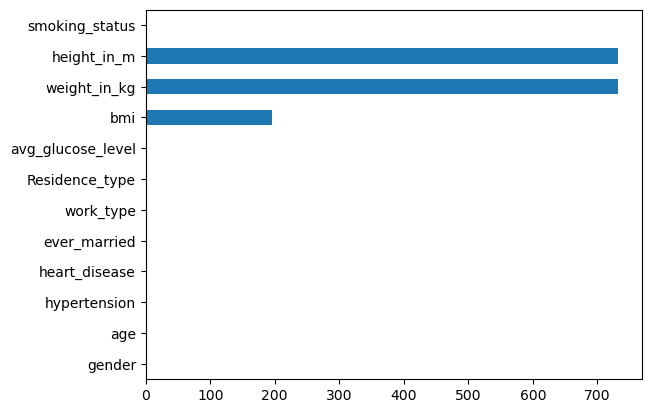

In [278]:
print(df.isna().sum())

df.isna().sum().plot.barh()

In [279]:
print("median of bmi",df['bmi'].median())


df['bmi']=df['bmi'].fillna(df['bmi'].median())




#fill the null of bmi using median

median of bmi 27.7


In [280]:
df['weight_in_kg']=df['weight_in_kg'].fillna(df['weight_in_kg'].median())
df['height_in_m']=df['height_in_m'].fillna(df['height_in_m'].median())


In [281]:
print(df.isna().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
weight_in_kg         0
height_in_m          0
smoking_status       0
dtype: int64


#cap the outliers

In [283]:

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
outlier_condition = (df[numerical_features] < (Q1 - 1.5 * IQR)) | \
                    (df[numerical_features] > (Q3 + 1.5 * IQR))

# Determine which rows contain outliers (True/False)
outliers = outlier_condition.any(axis=1)

print(f"Number of outliers detected using IQR: {outliers.sum()}")

Number of outliers detected using IQR: 901


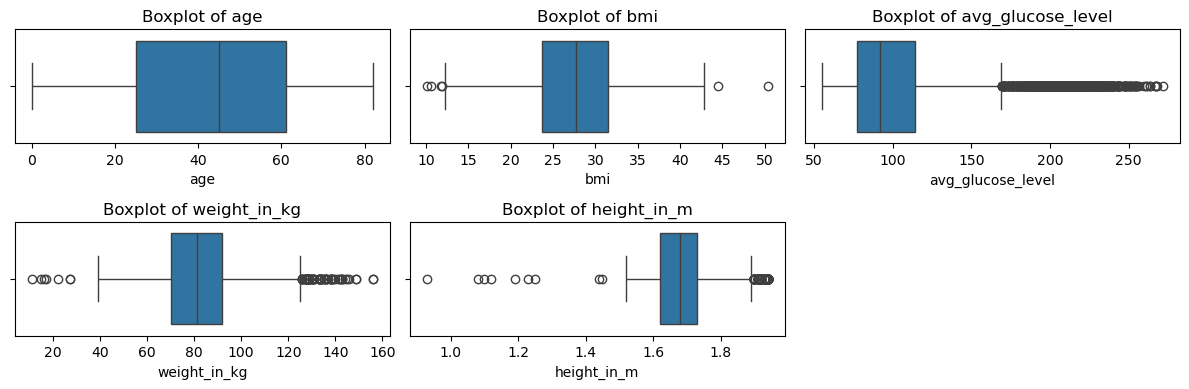

In [284]:

plt.figure(figsize=(12, 4))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

Cap (Winsorize) to maintain sample size while reducing the impact of extreme values.

In [286]:
from scipy.stats.mstats import winsorize

df_capped = df.copy()
for feature in numerical_features:
    df_capped[feature] = winsorize(df_capped[feature], limits=[0.05, 0.05])

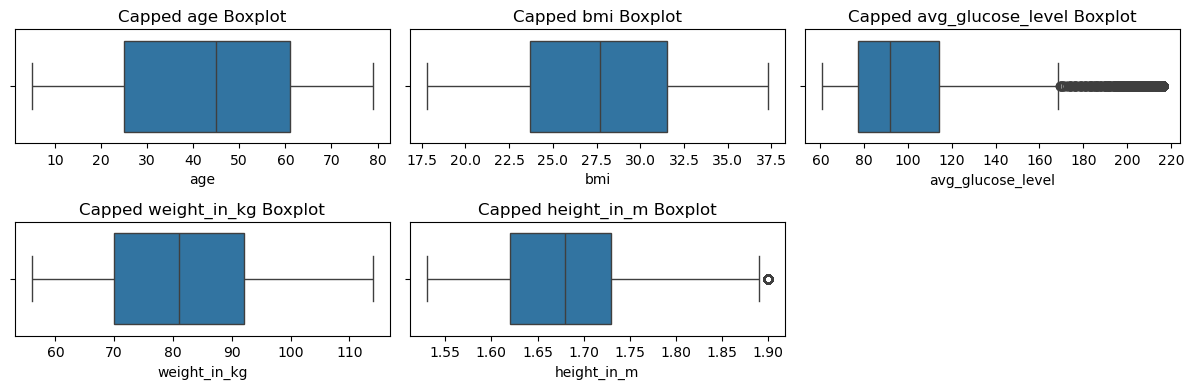

In [287]:
plt.figure(figsize=(12, 4))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_capped[feature])
    plt.title(f"Capped {feature} Boxplot")
plt.tight_layout()
plt.show()


# STEP 3 DATA TRANSFORMATION

In [289]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,weight_in_kg,height_in_m,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,116.0,1.78,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.7,86.0,1.68,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.6,92.0,1.68,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.5,83.0,1.55,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,63.0,1.62,never smoked


In [290]:
#NORMALIZED THE DATA ON THE SAME SCALE

In [291]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit and transform numerical features
df[numerical_features] = minmax_scaler.fit_transform(df[numerical_features])

# Verify scaling
print(df[numerical_features].head())


        age       bmi  avg_glucose_level  weight_in_kg  height_in_m
0  0.816895  0.657568           0.801265      0.724138     0.841584
1  0.743652  0.436725           0.679023      0.517241     0.742574
2  0.975586  0.558313           0.234512      0.558621     0.742574
3  0.597168  0.605459           0.536008      0.496552     0.613861
4  0.963379  0.344913           0.549349      0.358621     0.683168


In [292]:
print(df.head())


   gender       age  hypertension  heart_disease ever_married      work_type  \
0    Male  0.816895             0              1          Yes        Private   
1  Female  0.743652             0              0          Yes  Self-employed   
2    Male  0.975586             0              1          Yes        Private   
3  Female  0.597168             0              0          Yes        Private   
4  Female  0.963379             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level       bmi  weight_in_kg  height_in_m  \
0          Urban           0.801265  0.657568      0.724138     0.841584   
1          Rural           0.679023  0.436725      0.517241     0.742574   
2          Rural           0.234512  0.558313      0.558621     0.742574   
3          Urban           0.536008  0.605459      0.496552     0.613861   
4          Rural           0.549349  0.344913      0.358621     0.683168   

    smoking_status  
0  formerly smoked  
1     never smoked  

In [293]:
df['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          688
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [294]:
# Identify nominal categorical features
nominal_features = ['work_type', 'smoking_status']

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

# Verify encoding
print(df.head())


   gender       age  hypertension  heart_disease ever_married Residence_type  \
0    Male  0.816895             0              1          Yes          Urban   
1  Female  0.743652             0              0          Yes          Rural   
2    Male  0.975586             0              1          Yes          Rural   
3  Female  0.597168             0              0          Yes          Urban   
4  Female  0.963379             1              0          Yes          Rural   

   avg_glucose_level       bmi  weight_in_kg  height_in_m  \
0           0.801265  0.657568      0.724138     0.841584   
1           0.679023  0.436725      0.517241     0.742574   
2           0.234512  0.558313      0.558621     0.742574   
3           0.536008  0.605459      0.496552     0.613861   
4           0.549349  0.344913      0.358621     0.683168   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False               True                    False   
1     

In [295]:
# Encode to binary
df['gender'] = df['gender'].map({'Other':2 ,'Male': 1, 'Female': 0})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

# Verify conversion
print(df['ever_married'].head())

print(df['Residence_type'].head())


0    1
1    1
2    1
3    1
4    1
Name: ever_married, dtype: int64
0    1
1    0
2    0
3    1
4    0
Name: Residence_type, dtype: int64


In [296]:
df['Residence_type'].value_counts()

Residence_type
1    2596
0    2514
Name: count, dtype: int64

In [297]:
# List non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: []


gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
weight_in_kg                      0
height_in_m                       0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64


<Axes: >

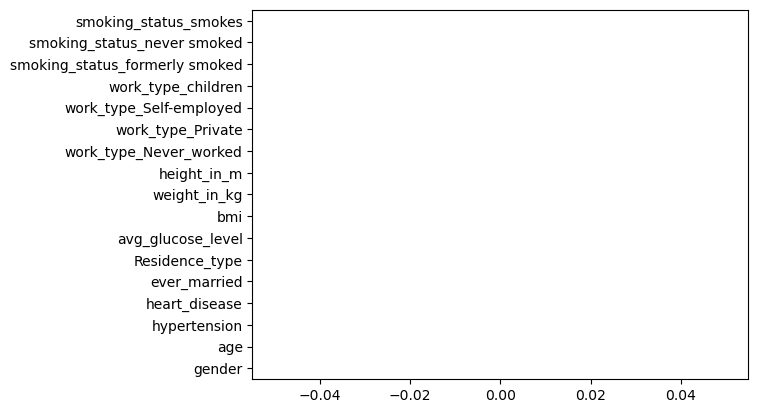

In [298]:
print(df.isna().sum())

df.isna().sum().plot.barh()

# STEP 4 Dimensionality Reduction PCA

PCA Explained Variance Ratio: [0.19624502 0.14705021]
Total Variance Explained: 0.3432952248772346


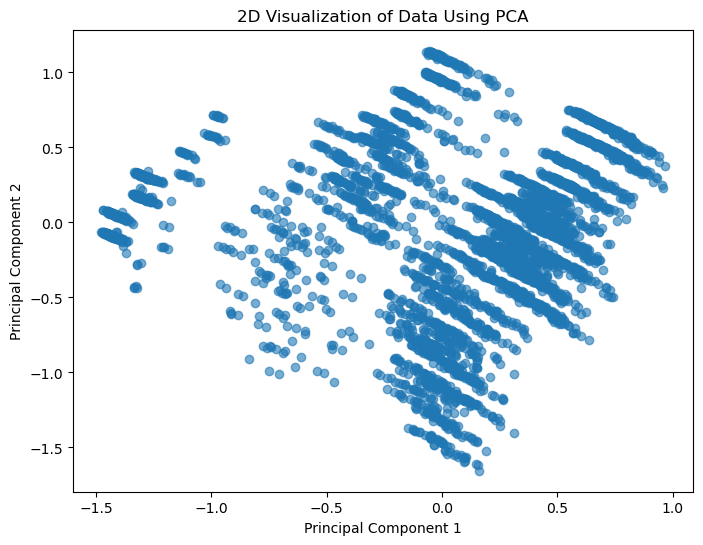

In [300]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Keep 2 components
pca_features = pca.fit_transform(df)

df_pca = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])

# 4. Check explained variance
print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", pca.explained_variance_ratio_.sum())

# 5. Visualize
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of Data Using PCA')
plt.show()

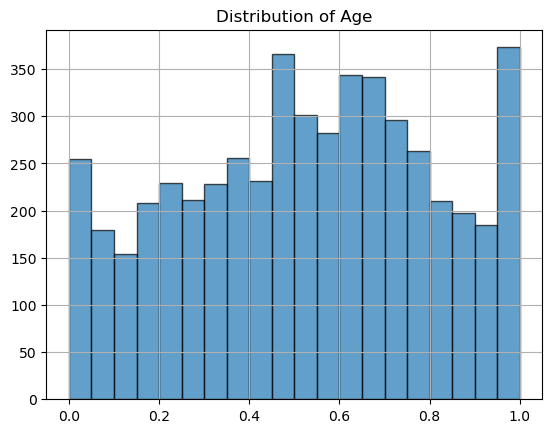

In [301]:
# 1. Basic Distributions
df['age'].hist(bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Age')
plt.show()

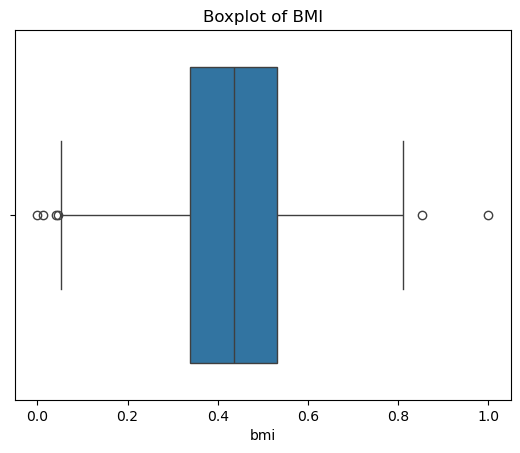

In [302]:
# 2. Boxplot of BMI
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI')
plt.show()


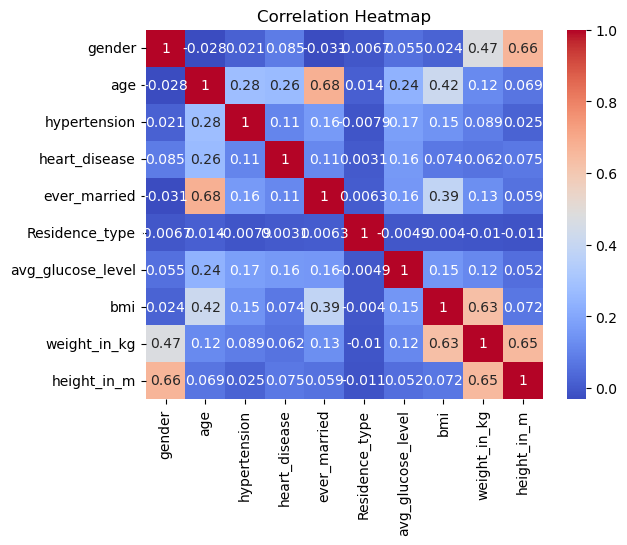

In [303]:
# 3. Correlation Heatmap
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

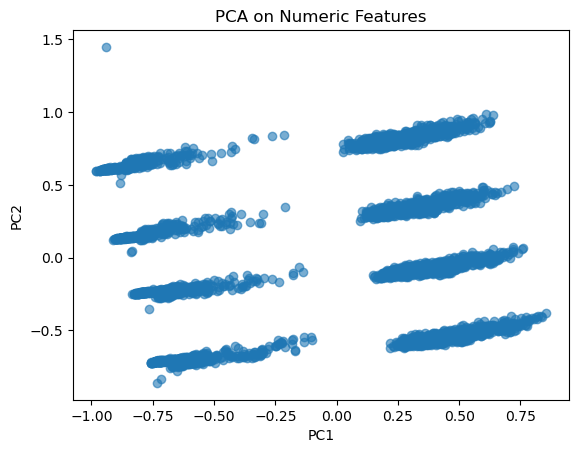

In [304]:
# 4. PCA Visualization
numeric_df = df.select_dtypes(include=[np.number]).dropna()
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(numeric_df)
df_pca = pd.DataFrame(pca_coords, columns=['PC1', 'PC2'])
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.6)
plt.title('PCA on Numeric Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

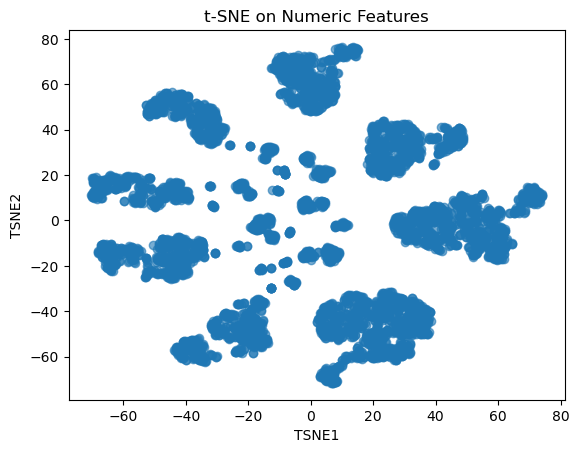

In [305]:
from sklearn.manifold import TSNE

# 5. t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_coords = tsne.fit_transform(numeric_df)
df_tsne = pd.DataFrame(tsne_coords, columns=['TSNE1', 'TSNE2'])
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], alpha=0.6)
plt.title('t-SNE on Numeric Features')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [306]:
numeric_df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,weight_in_kg,height_in_m
0,1,0.816895,0,1,1,1,0.801265,0.657568,0.724138,0.841584
1,0,0.743652,0,0,1,0,0.679023,0.436725,0.517241,0.742574
2,1,0.975586,0,1,1,0,0.234512,0.558313,0.558621,0.742574
3,0,0.597168,0,0,1,1,0.536008,0.605459,0.496552,0.613861
4,0,0.963379,1,0,1,0,0.549349,0.344913,0.358621,0.683168
...,...,...,...,...,...,...,...,...,...,...
5105,0,0.975586,1,0,1,1,0.132167,0.436725,0.324138,0.613861
5106,0,0.987793,0,0,1,1,0.323516,0.736973,0.558621,0.584158
5107,0,0.426270,0,0,1,0,0.128658,0.513648,0.420690,0.594059
5108,1,0.621582,0,0,1,0,0.513203,0.387097,0.524138,0.900990


# STEP 5 EDA

<Axes: xlabel='smoking_status_smokes', ylabel='bmi'>

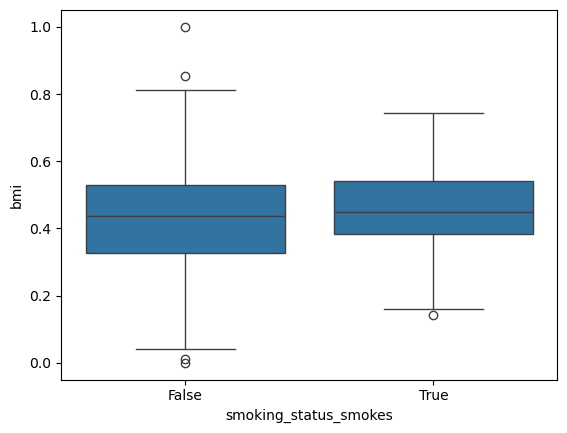

In [308]:
import seaborn as sns
sns.boxplot(x=df['smoking_status_smokes'], y=df['bmi'])


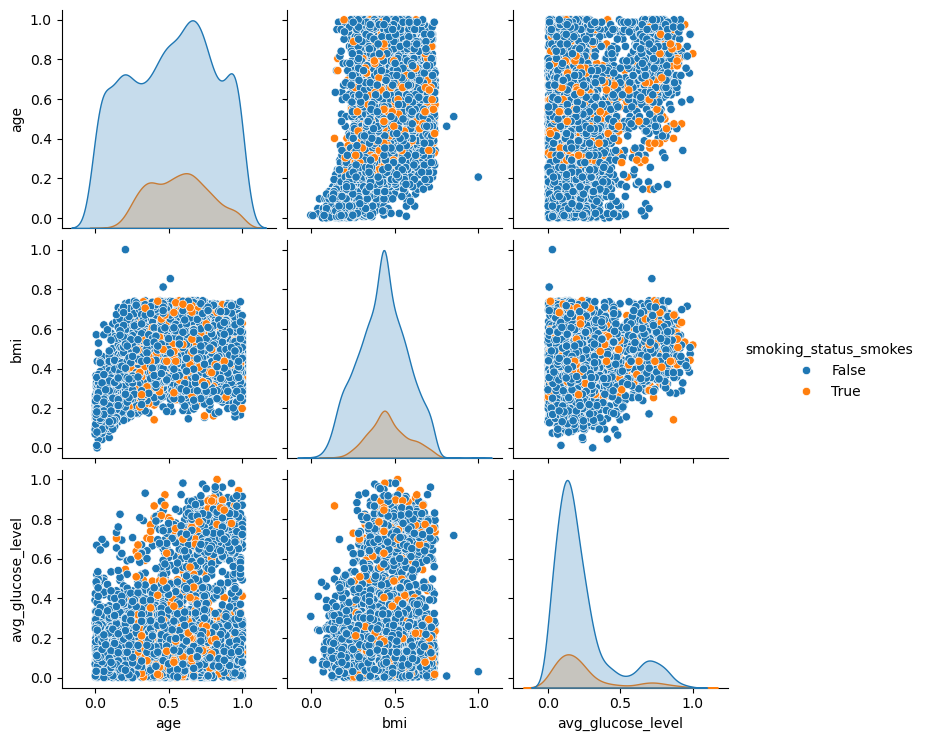

In [309]:
import seaborn as sns
sns.pairplot(df, vars=['age','bmi','avg_glucose_level'], hue='smoking_status_smokes')


In [310]:
from sklearn.preprocessing import StandardScaler

continuous_cols = ['age', 'bmi', 'avg_glucose_level']
scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])


In [311]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df)  # includes dummy and continuous


# STEP 6 k-MEANS AS CLUSTERING ALGORITHM

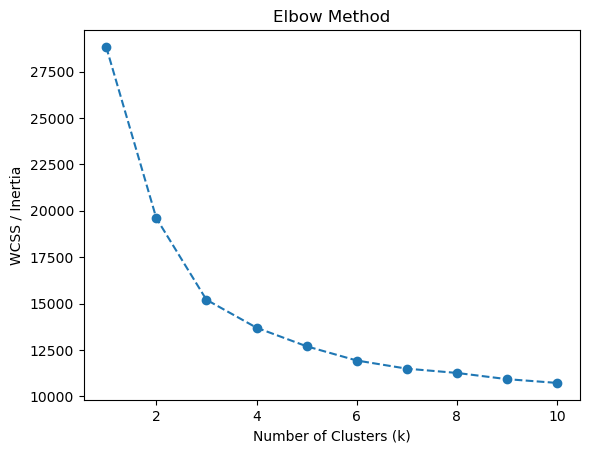

In [313]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)  # Assuming df is your numeric dataset
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS / Inertia')
plt.show()

# STEP 7 BUILD THE MODEL

In [315]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df)


In [316]:
df['Cluster'] = cluster_labels
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [317]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    print(f'k={k}, Silhouette Score={score:.4f}')


k=2, Silhouette Score=0.2329
k=3, Silhouette Score=0.3064
k=4, Silhouette Score=0.2192
k=5, Silhouette Score=0.1870
k=6, Silhouette Score=0.1682
k=7, Silhouette Score=0.1561
k=8, Silhouette Score=0.1554
k=9, Silhouette Score=0.1508
k=10, Silhouette Score=0.1420


In [318]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df)  # df is your numeric dataset
df['Cluster'] = cluster_labels


# STEP 8 CLUSTER EVALUATION

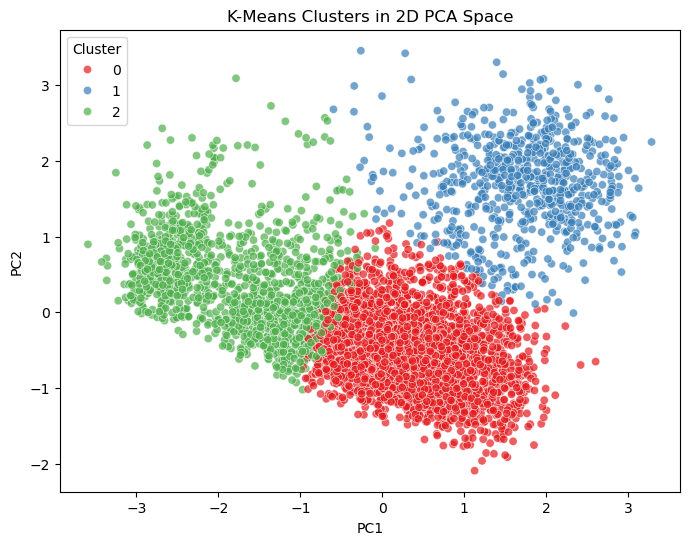

In [320]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df.drop('Cluster', axis=1))

import matplotlib.pyplot as plt
import seaborn as sns

df_pca = pd.DataFrame(pca_features, columns=['PC1','PC2'])
df_pca['Cluster'] = df['Cluster']

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2', 
    hue='Cluster', 
    data=df_pca, 
    palette='Set1', alpha=0.7
)
plt.title('K-Means Clusters in 2D PCA Space')
plt.show()


<Axes: xlabel='Cluster', ylabel='bmi'>

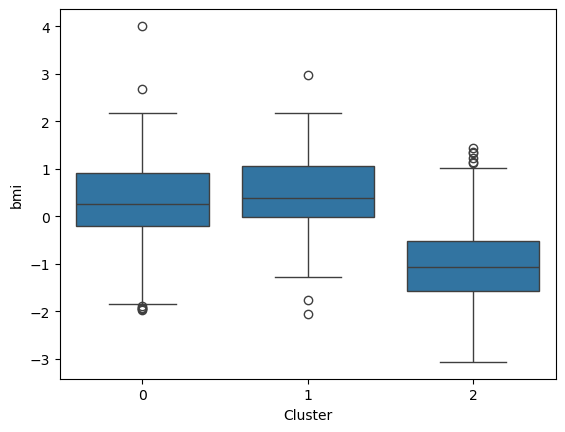

In [321]:
import seaborn as sns
sns.boxplot(x='Cluster', y='bmi', data=df)


In [322]:
import pandas as pd
from sklearn.decomposition import PCA

# Suppose 'df' is your numeric dataset (after encoding and/or scaling if necessary)
pca_3 = PCA(n_components=3)
pca_features_3 = pca_3.fit_transform(df)

# Convert the resulting array to a DataFrame
df_pca_3 = pd.DataFrame(
    data=pca_features_3, 
    columns=['PC1', 'PC2', 'PC3']
)

print("Explained Variance Ratio of 3 PCs:", pca_3.explained_variance_ratio_)
print("Sum of Explained Variance:", pca_3.explained_variance_ratio_.sum())
df_pca_3.head()


Explained Variance Ratio of 3 PCs: [0.37803746 0.19035097 0.11061894]
Sum of Explained Variance: 0.6790073689910526


,PC1,PC2,PC3
0,1.917029,2.702754,0.763670
1,0.787657,2.136645,-0.527405
2,1.922011,-0.124103,-0.225262
3,0.984466,1.382658,0.899473
4,0.861232,1.684205,-1.543572


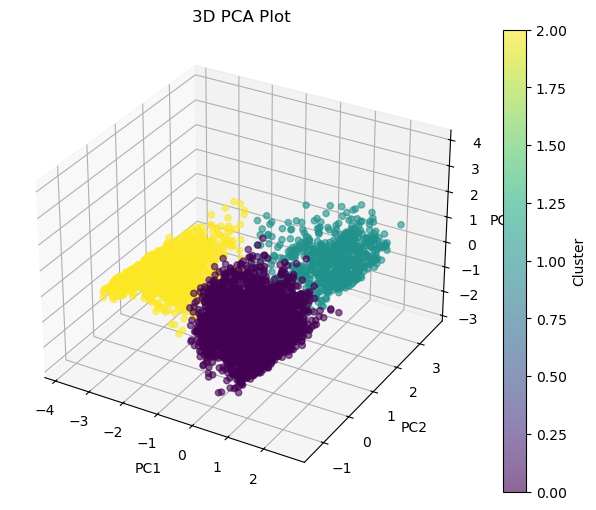

In [323]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import seaborn as sns



fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
sc = ax.scatter(
    df_pca_3['PC1'], 
    df_pca_3['PC2'], 
    df_pca_3['PC3'], 
    c=df['Cluster'] if 'Cluster' in df.columns else None, 
    cmap='viridis', 
    alpha=0.6
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Plot')


if 'Cluster' in df.columns:
    plt.colorbar(sc, label='Cluster')

plt.show()


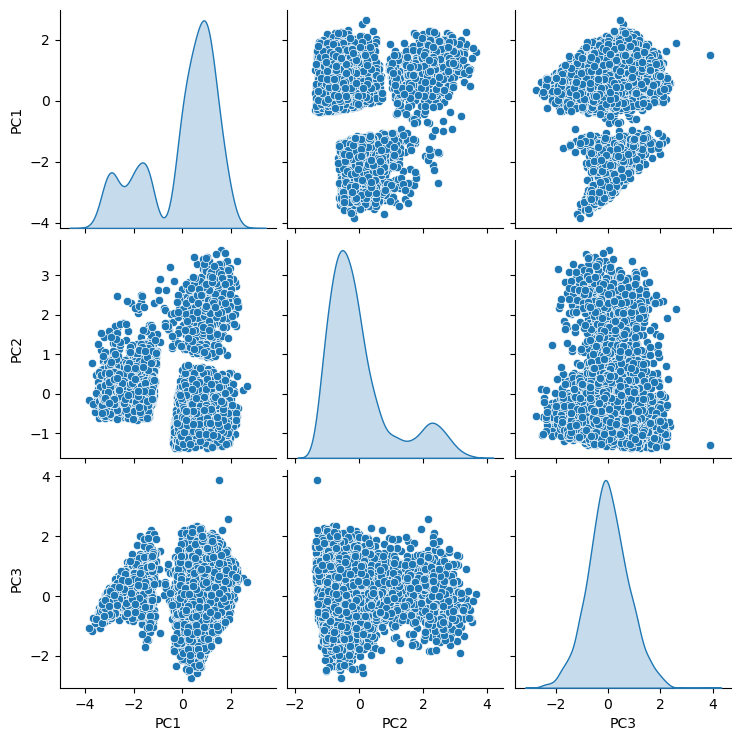

In [324]:
import seaborn as sns
sns.pairplot(df_pca_3, diag_kind='kde')


In [325]:
df.groupby('Cluster').mean()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,weight_in_kg,height_in_m,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
Cluster,,,,,,,,,,,,,,,,,
0,0.391432,0.374703,0.104644,0.053630,0.851864,0.503270,-0.370962,0.337327,0.507909,0.752417,0.000327,0.639634,0.202420,0.001635,0.206344,0.407783,0.186069
1,0.477143,0.776151,0.252857,0.157143,0.900000,0.521429,2.179987,0.489532,0.534887,0.766365,0.000000,0.605714,0.232857,0.002857,0.264286,0.408571,0.170000
2,0.433432,-1.249370,0.000740,0.001479,0.087278,0.511834,-0.289636,-1.016434,0.433968,0.736782,0.015533,0.402367,0.027367,0.503698,0.051036,0.265533,0.074704


In [326]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df.drop('Cluster', axis=1), df['Cluster'])
print(f"Final Silhouette Score: {sil_score:.4f}")

Final Silhouette Score: 0.2498
